# 1] Import Dependecies

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import seaborn as sns

from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA   #PCA module

import warnings
warnings.filterwarnings('ignore')

# 2] Load Dataset

In [2]:
data = pd.read_csv("University.csv")
print('We have {} rows and {} columns'.format(data.shape[0], data.shape[1]))
data.head()

We have 25 rows and 7 columns


,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [3]:
print('Dataset bottom observations:')
data.tail()

Dataset bottom observations:


,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
20,UMichigan,1180,65,68,16,15470,85
21,UPenn,1285,80,36,11,27553,90
22,UVA,1225,77,44,14,13349,92
23,UWisconsin,1085,40,69,15,11857,71
24,Yale,1375,95,19,11,43514,96


# 3] Exploratory Data Analysis

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SAT,25.0,1266.44,108.359771,1005.0,1240.0,1285.0,1340.0,1415.0
Top10,25.0,76.48,19.433905,28.0,74.0,81.0,90.0,100.0
Accept,25.0,39.20,19.727308,14.0,24.0,36.0,50.0,90.0
SFRatio,25.0,12.72,4.067350,6.0,11.0,12.0,14.0,25.0
Expenses,25.0,27388.00,14424.883165,8704.0,15140.0,27553.0,34870.0,63575.0
GradRate,25.0,86.72,9.057778,67.0,81.0,90.0,94.0,97.0


In [10]:
data.duplicated().sum()

0

In [11]:
data.isnull().sum()

Univ        0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

# 4] Visualization

In [12]:
cm = sns.light_palette("green", as_cmap=True)
data.head(10).style.background_gradient(cmap=cm)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [13]:
data.sort_values(by='GradRate',ascending=True).head(10).style.background_gradient(cmap=cm)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
17,TexasA&M,1075,49,67,25,8704,67
15,Purdue,1005,28,90,19,9066,69
23,UWisconsin,1085,40,69,15,11857,71
2,CMU,1260,62,59,9,25026,72
18,UCBerkeley,1240,95,40,17,15140,78
13,PennState,1081,38,54,18,10185,80
1,CalTech,1415,100,25,6,63575,81
20,UMichigan,1180,65,68,16,15470,85
19,UChicago,1290,75,50,13,38380,87
9,JohnsHopkins,1305,75,44,7,58691,87


In [14]:
data.sort_values(by='Expenses',ascending=True).head(10).style.background_gradient(cmap=cm)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
17,TexasA&M,1075,49,67,25,8704,67
15,Purdue,1005,28,90,19,9066,69
13,PennState,1081,38,54,18,10185,80
23,UWisconsin,1085,40,69,15,11857,71
22,UVA,1225,77,44,14,13349,92
12,NotreDame,1255,81,42,13,15122,94
18,UCBerkeley,1240,95,40,17,15140,78
20,UMichigan,1180,65,68,16,15470,85
7,Georgetown,1255,74,24,12,20126,92
4,Cornell,1280,83,33,13,21864,90


In [15]:
data.sort_values(by='Top10',ascending=True).head(10).style.background_gradient(cmap=cm)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
15,Purdue,1005,28,90,19,9066,69
13,PennState,1081,38,54,18,10185,80
23,UWisconsin,1085,40,69,15,11857,71
17,TexasA&M,1075,49,67,25,8704,67
2,CMU,1260,62,59,9,25026,72
20,UMichigan,1180,65,68,16,15470,85
7,Georgetown,1255,74,24,12,20126,92
19,UChicago,1290,75,50,13,38380,87
9,JohnsHopkins,1305,75,44,7,58691,87
3,Columbia,1310,76,24,12,31510,88


In [16]:
data.sort_values(by='Accept',ascending=True).head(10).style.background_gradient(cmap=cm)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
14,Princeton,1375,91,14,8,30220,95
8,Harvard,1400,91,14,11,39525,97
24,Yale,1375,95,19,11,43514,96
16,Stanford,1360,90,20,12,36450,93
0,Brown,1310,89,22,13,22704,94
5,Dartmouth,1340,89,23,10,32162,95
7,Georgetown,1255,74,24,12,20126,92
3,Columbia,1310,76,24,12,31510,88
1,CalTech,1415,100,25,6,63575,81
6,Duke,1315,90,30,12,31585,95


In [17]:
data.sort_values(by='SFRatio',ascending=True).head(10).style.background_gradient(cmap=cm)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
1,CalTech,1415,100,25,6,63575,81
9,JohnsHopkins,1305,75,44,7,58691,87
14,Princeton,1375,91,14,8,30220,95
2,CMU,1260,62,59,9,25026,72
5,Dartmouth,1340,89,23,10,32162,95
10,MIT,1380,94,30,10,34870,91
24,Yale,1375,95,19,11,43514,96
21,UPenn,1285,80,36,11,27553,90
8,Harvard,1400,91,14,11,39525,97
11,Northwestern,1260,85,39,11,28052,89


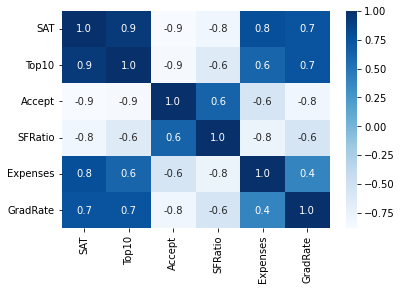

In [18]:
sns.heatmap(data.corr(),annot=True, cbar=True, cmap='Blues', fmt='.1f');

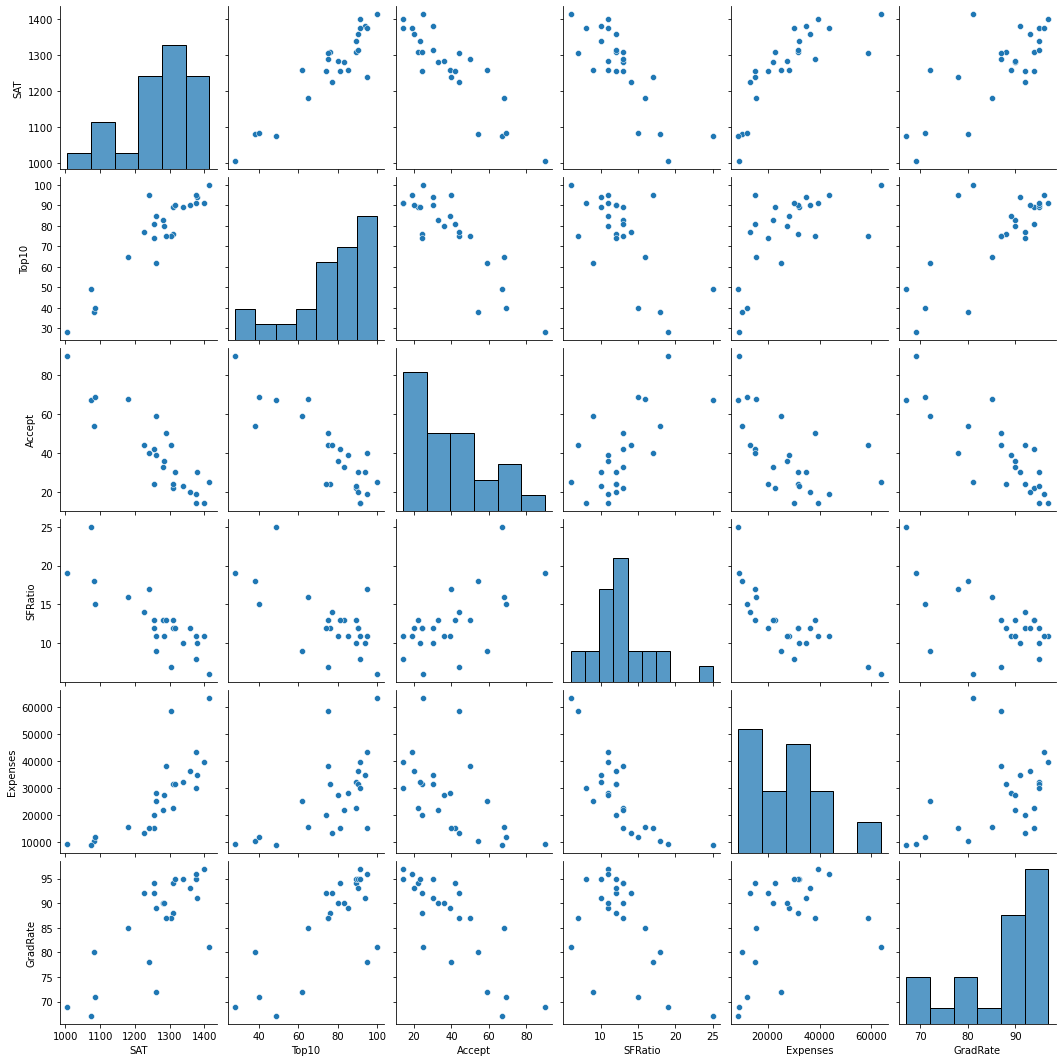

In [19]:
sns.pairplot(data)

- ### Accept & SF Ratio are correlated

# 5] Model Building

In [20]:
# Considering only numerical data 
df1 = data.iloc[:,1:]    #except Univ column

df1.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


In [21]:
# Converting into numpy array
num_data = df1.values
num_data 

array([[ 1310,    89,    22,    13, 22704,    94],
       [ 1415,   100,    25,     6, 63575,    81],
       [ 1260,    62,    59,     9, 25026,    72],
       [ 1310,    76,    24,    12, 31510,    88],
       [ 1280,    83,    33,    13, 21864,    90],
       [ 1340,    89,    23,    10, 32162,    95],
       [ 1315,    90,    30,    12, 31585,    95],
       [ 1255,    74,    24,    12, 20126,    92],
       [ 1400,    91,    14,    11, 39525,    97],
       [ 1305,    75,    44,     7, 58691,    87],
       [ 1380,    94,    30,    10, 34870,    91],
       [ 1260,    85,    39,    11, 28052,    89],
       [ 1255,    81,    42,    13, 15122,    94],
       [ 1081,    38,    54,    18, 10185,    80],
       [ 1375,    91,    14,     8, 30220,    95],
       [ 1005,    28,    90,    19,  9066,    69],
       [ 1360,    90,    20,    12, 36450,    93],
       [ 1075,    49,    67,    25,  8704,    67],
       [ 1240,    95,    40,    17, 15140,    78],
       [ 1290,    75,    50,   

In [22]:
# Normalizing the numerical data 
uni_normal = scale(num_data)

In [23]:
uni_normal

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [25]:
pca = PCA()
pca_values = pca.fit_transform(uni_normal)

In [26]:
pca_values

array([[-1.00987445e+00, -1.06430962e+00,  8.10663051e-02,
         5.69506350e-02, -1.28754245e-01, -3.46496377e-02],
       [-2.82223781e+00,  2.25904458e+00,  8.36828830e-01,
         1.43844644e-01, -1.25961913e-01, -1.80703168e-01],
       [ 1.11246577e+00,  1.63120889e+00, -2.66786839e-01,
         1.07507502e+00, -1.91814148e-01,  3.45679459e-01],
       [-7.41741217e-01, -4.21874699e-02,  6.05008649e-02,
        -1.57208116e-01, -5.77611392e-01,  1.09163092e-01],
       [-3.11912064e-01, -6.35243572e-01,  1.02405189e-02,
         1.71363672e-01,  1.27261287e-02, -1.69212696e-02],
       [-1.69669089e+00, -3.44363283e-01, -2.53407507e-01,
         1.25643278e-02, -5.26606002e-02, -2.71661600e-02],
       [-1.24682093e+00, -4.90983662e-01, -3.20938196e-02,
        -2.05643780e-01,  2.93505340e-01, -7.80119838e-02],
       [-3.38749784e-01, -7.85168589e-01, -4.93584829e-01,
         3.98563085e-02, -5.44978619e-01, -1.55371653e-01],
       [-2.37415013e+00, -3.86538883e-01,  1.160

In [37]:
pca = PCA(n_components = 4)
pca_values = pca.fit_transform(uni_normal)
pca_values

array([[-1.00987445, -1.06430962,  0.08106631,  0.05695064],
       [-2.82223781,  2.25904458,  0.83682883,  0.14384464],
       [ 1.11246577,  1.63120889, -0.26678684,  1.07507502],
       [-0.74174122, -0.04218747,  0.06050086, -0.15720812],
       [-0.31191206, -0.63524357,  0.01024052,  0.17136367],
       [-1.69669089, -0.34436328, -0.25340751,  0.01256433],
       [-1.24682093, -0.49098366, -0.03209382, -0.20564378],
       [-0.33874978, -0.78516859, -0.49358483,  0.03985631],
       [-2.37415013, -0.38653888,  0.11609839, -0.45336562],
       [-1.40327739,  2.11951503, -0.44282714, -0.63254327],
       [-1.72610332,  0.08823712,  0.17040366,  0.26090191],
       [-0.45085748, -0.01113295, -0.17574605,  0.23616563],
       [ 0.04023814, -1.00920438, -0.49651717,  0.22929876],
       [ 3.23373034, -0.37458049, -0.49537282, -0.52123771],
       [-2.23626502, -0.37179329, -0.39899365,  0.40696648],
       [ 5.17299212,  0.77991535, -0.38591233, -0.23221171],
       [-1.69964377, -0.

In [38]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.76868084, 0.13113602, 0.04776031, 0.02729668])

In [39]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([76.87, 89.98, 94.76, 97.49])

In [40]:
pca.components_   #features

array([[-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
        -0.37940403],
       [ 0.03968044, -0.19993153,  0.32089297, -0.43256441,  0.6344864 ,
        -0.51555367],
       [ 0.1870388 ,  0.49780855, -0.15627899,  0.60608085,  0.20474114,
        -0.53247261],
       [ 0.13124033,  0.37489567,  0.0612872 , -0.50739095, -0.62340055,
        -0.43863341]])

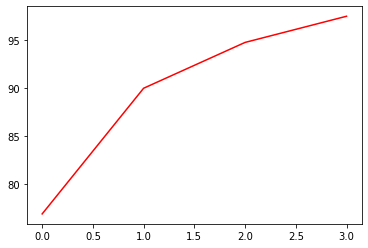

In [41]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [42]:
 pca_values[:,0:1]

array([[-1.00987445],
       [-2.82223781],
       [ 1.11246577],
       [-0.74174122],
       [-0.31191206],
       [-1.69669089],
       [-1.24682093],
       [-0.33874978],
       [-2.37415013],
       [-1.40327739],
       [-1.72610332],
       [-0.45085748],
       [ 0.04023814],
       [ 3.23373034],
       [-2.23626502],
       [ 5.17299212],
       [-1.69964377],
       [ 4.578146  ],
       [ 0.82260312],
       [-0.09776213],
       [ 1.9631826 ],
       [-0.54228894],
       [ 0.53222092],
       [ 3.54869664],
       [-2.30590032]])

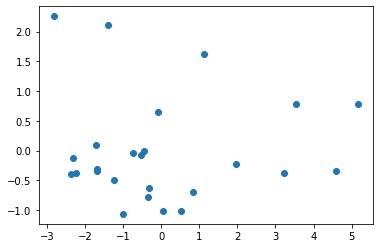

In [43]:
# plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
#z = pca_values[:2:3]
plt.scatter(x,y)

In [58]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:4], columns=['pc1','pc2', 'pc3','pc4']), data[['Univ']]], axis = 1)
finalDf

,pc1,pc2,pc3,pc4,Univ
0,-1.009874,-1.064310,0.081066,0.056951,Brown
1,-2.822238,2.259045,0.836829,0.143845,CalTech
2,1.112466,1.631209,-0.266787,1.075075,CMU
3,-0.741741,-0.042187,0.060501,-0.157208,Columbia
4,-0.311912,-0.635244,0.010241,0.171364,Cornell
5,-1.696691,-0.344363,-0.253408,0.012564,Dartmouth
6,-1.246821,-0.490984,-0.032094,-0.205644,Duke
7,-0.338750,-0.785169,-0.493585,0.039856,Georgetown
8,-2.374150,-0.386539,0.116098,-0.453366,Harvard
9,-1.403277,2.119515,-0.442827,-0.632543,JohnsHopkins


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

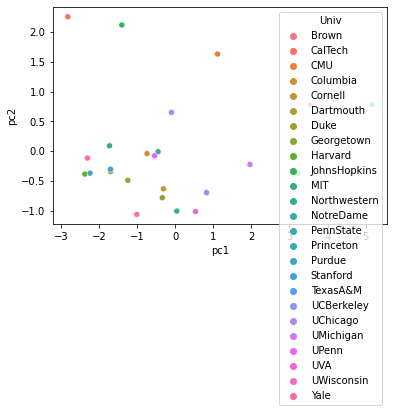

In [59]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Univ')